# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Calvin
- **Email:** m180d4ky1760@bangkit.academy
- **ID Dicoding:** Calvin

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan kadar CO setiap tahunnya di berbagai stasiun?
- Bagaimana korelasi status PM2.5 terhadap kadar CO?
- Bagaimana korelasi Temperature terhadap Dew Point?

## Import Semua Packages/Library yang Digunakan

In [47]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [48]:
names = []
direc = "Data/"
for files in os.listdir(direc):
    names.append(direc + files)

In [49]:
# concat all the files into one dataframe
df = pd.concat([pd.read_csv(f) for f in names], ignore_index=True)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


### Assessing Data

In [50]:
print("missing value list: ")
print(df.isnull().sum()) # check missing values
# print("\nduplicated value list: ")

missing value list: 
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


### Cleaning Data

In [51]:
df = df.dropna()
# df = df.drop(columns=['No','station', 'wd'])
df.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [52]:
df.groupby('station').corr(numeric_only=True)

No      year     month       day      hour  \
station                                                                 
Aotizhongxin  No     1.000000  0.969426  0.067551  0.026484  0.006155   
              year   0.969426  1.000000 -0.178465  0.002849  0.004969   
              month  0.067551 -0.178465  1.000000  0.010692  0.001735   
              day    0.026484  0.002849  0.010692  1.000000 -0.000207   
              hour   0.006155  0.004969  0.001735 -0.000207  1.000000   
...                       ...       ...       ...       ...       ...   
Wanshouxigong TEMP  -0.127289 -0.157164  0.130586  0.015639  0.133127   
              PRES   0.272834  0.263337  0.016250  0.014005 -0.036080   
              DEWP  -0.101414 -0.165407  0.265631  0.026928 -0.014240   
              RAIN   0.007449  0.003811  0.014877 -0.006067  0.006887   
              WSPM   0.070802  0.099735 -0.120522 -0.014654  0.144449   

                        PM2.5      PM10       SO2       NO2        CO  \
station                                                                 
Aotizhongxin  No    -0.027866 -0.085685 -0.245131 -0.086058  0.070917   
              year  -0.031908 -0.076424 -0.175384 -0.112066  0.058492   
              month  0.016911 -0.035822 -0.270781  0.109088  0.047609   
              day    0.009715  0.033096 -0.023222  0.016110 -0.020095   
              hour  -0.010580  0.020580  0.001181 -0.045403 -0.045401   
...                       ...       ...       ...       ...       ...   
Wanshouxigong TEMP  -0.178925 -0.138585 -0.349998 -0.303552 -0.332174   
              PRES   0.024764 -0.013586  0.193437  0.133010  0.158194   
              DEWP   0.082023  0.048336 -0.284991 -0.022184 -0.044784   
              RAIN  -0.018852 -0.030472 -0.041542 -0.044704 -0.014487   
              WSPM  -0.301496 -0.233212 -0.139093 -0.478995 -0.338648   

                           O3      TEMP      PRES      DEWP      RAIN  \
station                                                                 
Aotizhongxin  No     0.063351 -0.116645  0.241082 -0.139133  0.004014   
              year   0.085586 -0.158463  0.246033 -0.215746 -0.000300   
              month -0.093766  0.177046 -0.037046  0.318998  0.017630   
              day    0.007848  0.031208  0.010470  0.044015 -0.000800   
              hour   0.296388  0.139401 -0.038339 -0.013471  0.012211   
...                       ...       ...       ...       ...       ...   
Wanshouxigong TEMP   0.617957  1.000000 -0.826735  0.818468  0.036806   
              PRES  -0.452858 -0.826735  1.000000 -0.768340 -0.061057   
              DEWP   0.331796  0.818468 -0.768340  1.000000  0.085704   
              RAIN   0.022419  0.036806 -0.061057  0.085704  1.000000   
              WSPM   0.319384  0.056128  0.059117 -0.279069  0.032236   

                         WSPM  
station                        
Aotizhongxin  No     0.097572  
              year   0.135931  
              month -0.160100  
              day   -0.021669  
              hour   0.150500  
...                       ...  
Wanshouxigong TEMP   0.056128  
              PRES   0.059117  
              DEWP  -0.279069  
              RAIN   0.032236  
              WSPM   1.000000  

[192 rows x 16 columns]

### Combine year, month, and day as new column date

In [53]:
def data_date(df):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    return df

df = data_date(df)

C:\Users\M-SI\AppData\Local\Temp\ipykernel_1576\2806356008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


## Exploratory Data Analysis (EDA)

### Explore Correlations

In [54]:
df.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,0.968620,0.056211,0.016624,-0.003728,-0.026866,-0.049872,-0.227301,-0.042262,0.025281,-0.048242,-0.133544,0.193543,-0.110269,0.005496,0.056503
year,0.968620,1.000000,-0.192834,-0.008714,-0.003916,-0.029904,-0.044236,-0.168161,-0.052299,0.012698,-0.022092,-0.167188,0.194616,-0.178617,0.001162,0.091041
month,0.056211,-0.192834,1.000000,0.017476,-0.001570,0.013363,-0.021498,-0.223866,0.041530,0.049558,-0.101052,0.146401,-0.022140,0.283626,0.017509,-0.142276
day,0.016624,-0.008714,0.017476,1.000000,-0.002153,0.003457,0.024428,-0.006733,0.013503,-0.017784,-0.001101,0.012243,0.022391,0.024001,-0.002783,-0.013504
hour,-0.003728,-0.003916,-0.001570,-0.002153,1.000000,0.013275,0.051421,0.032342,-0.002536,-0.030150,0.281204,0.139155,-0.038386,-0.012506,0.012610,0.137995
PM2.5,-0.026866,-0.029904,0.013363,0.003457,0.013275,1.000000,0.884324,0.482209,0.670753,0.792041,-0.151149,-0.128907,0.013717,0.118009,-0.015268,-0.275686
PM10,-0.049872,-0.044236,-0.021498,0.024428,0.051421,0.884324,1.000000,0.466561,0.653577,0.703535,-0.114345,-0.094793,-0.021942,0.072706,-0.026885,-0.185789
SO2,-0.227301,-0.168161,-0.223866,-0.006733,0.032342,0.482209,0.466561,1.000000,0.501317,0.535289,-0.167093,-0.320991,0.218994,-0.266446,-0.040618,-0.109259
NO2,-0.042262,-0.052299,0.041530,0.013503,-0.002536,0.670753,0.653577,0.501317,1.000000,0.705651,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.402566
CO,0.025281,0.012698,0.049558,-0.017784,-0.030150,0.792041,0.703535,0.535289,0.705651,1.000000,-0.315060,-0.323402,0.183800,-0.054173,-0.013302,-0.297760


## Visualization & Explanatory Analysis

### Pertanyaan 1:

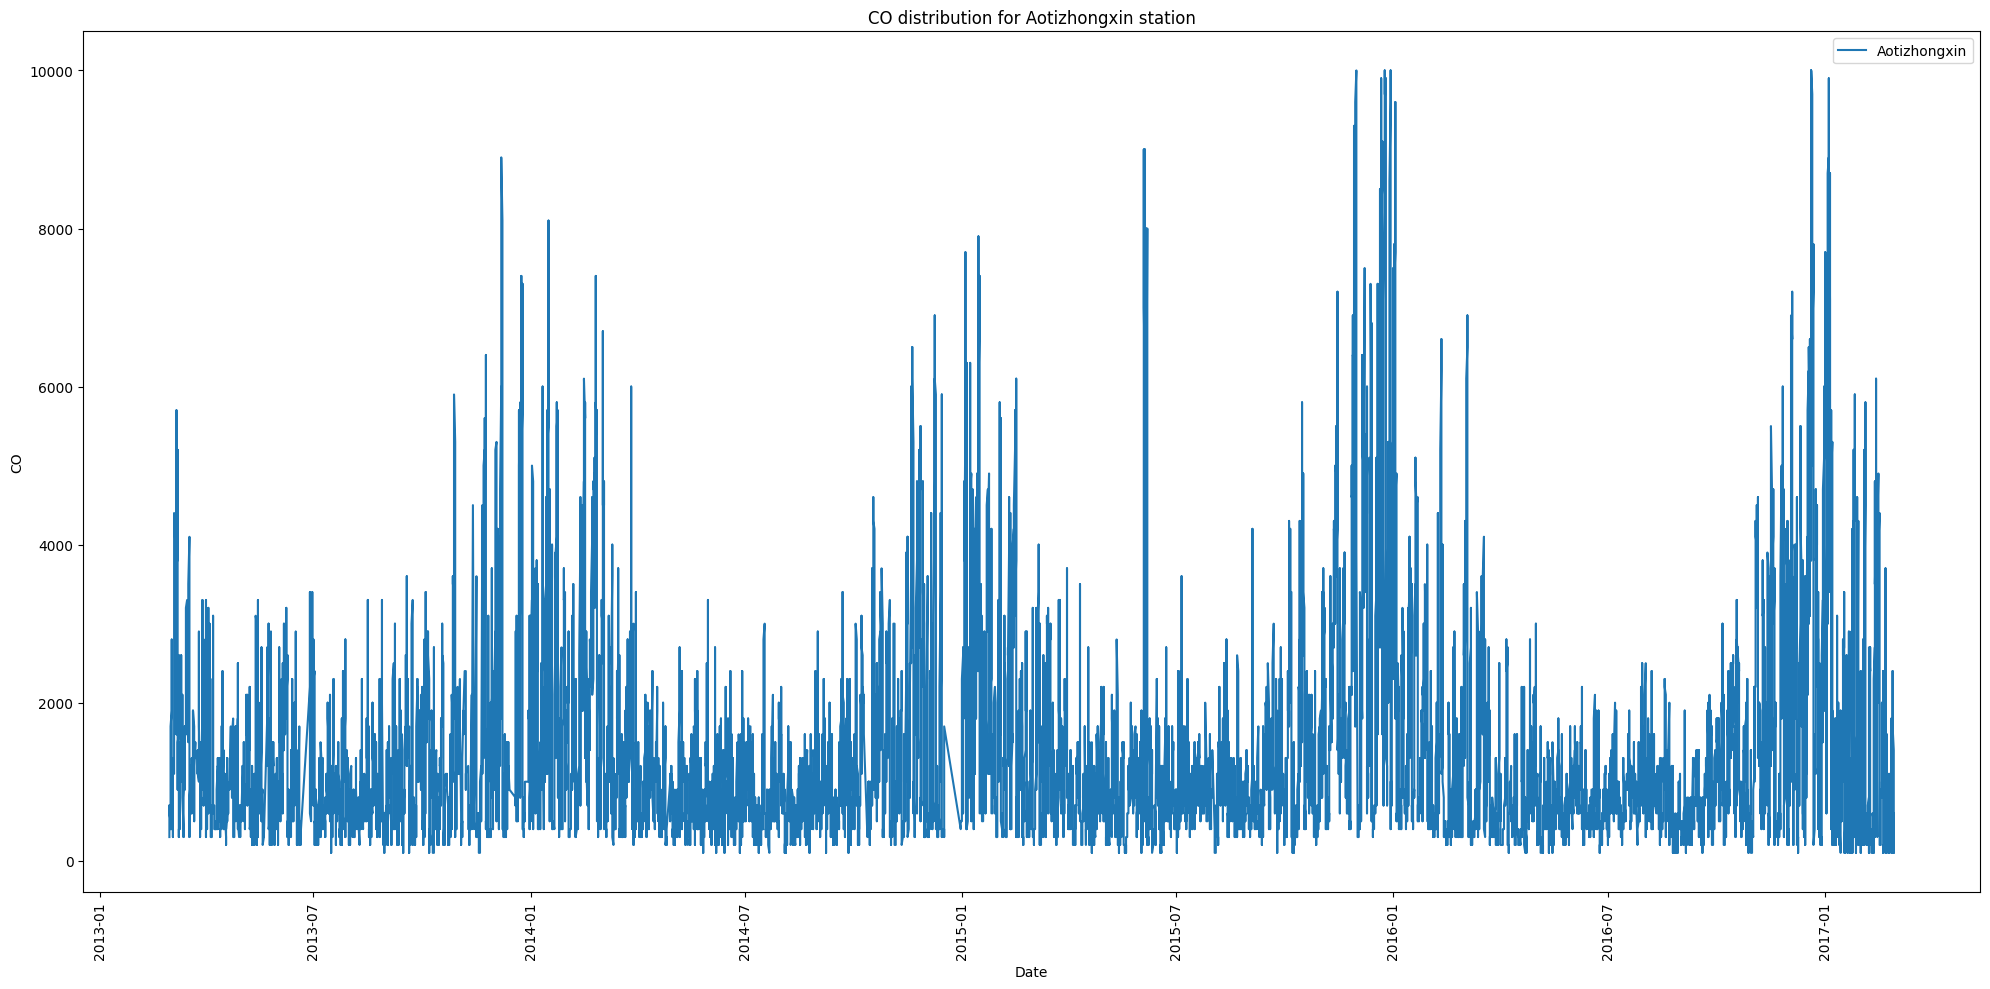

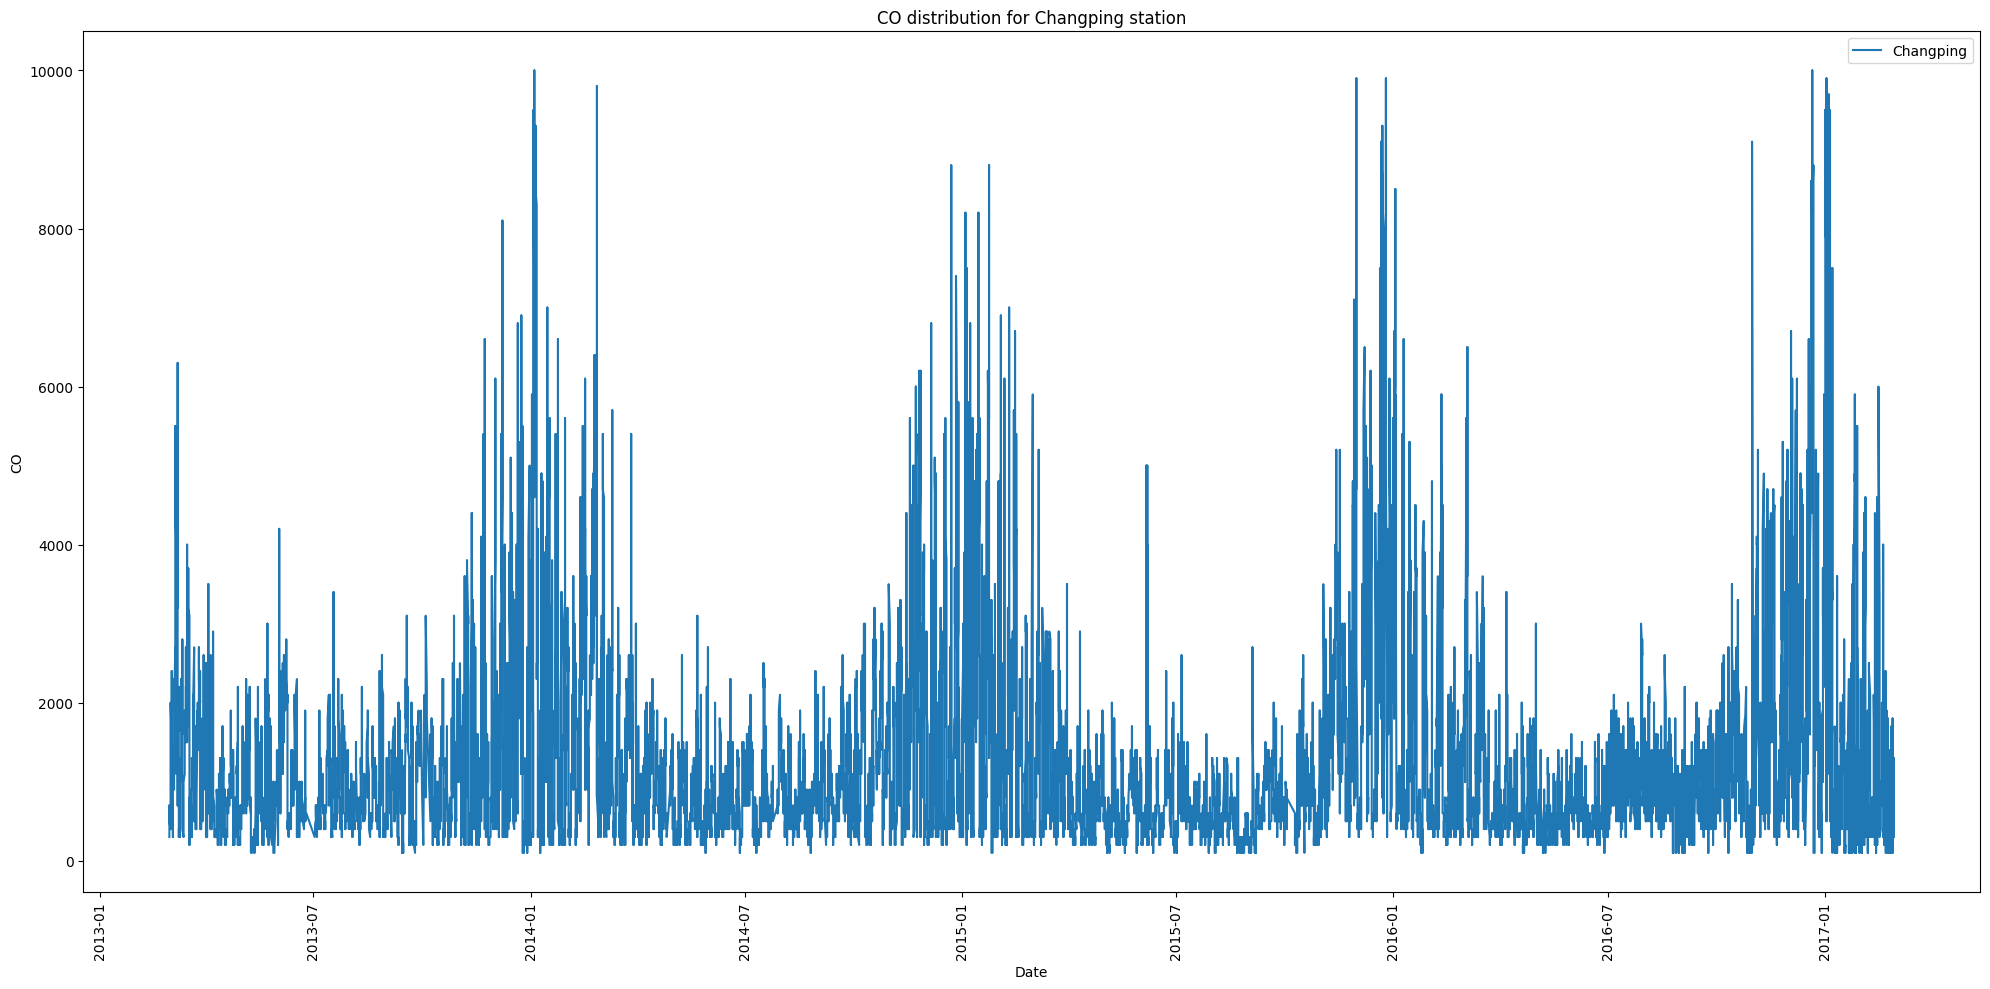

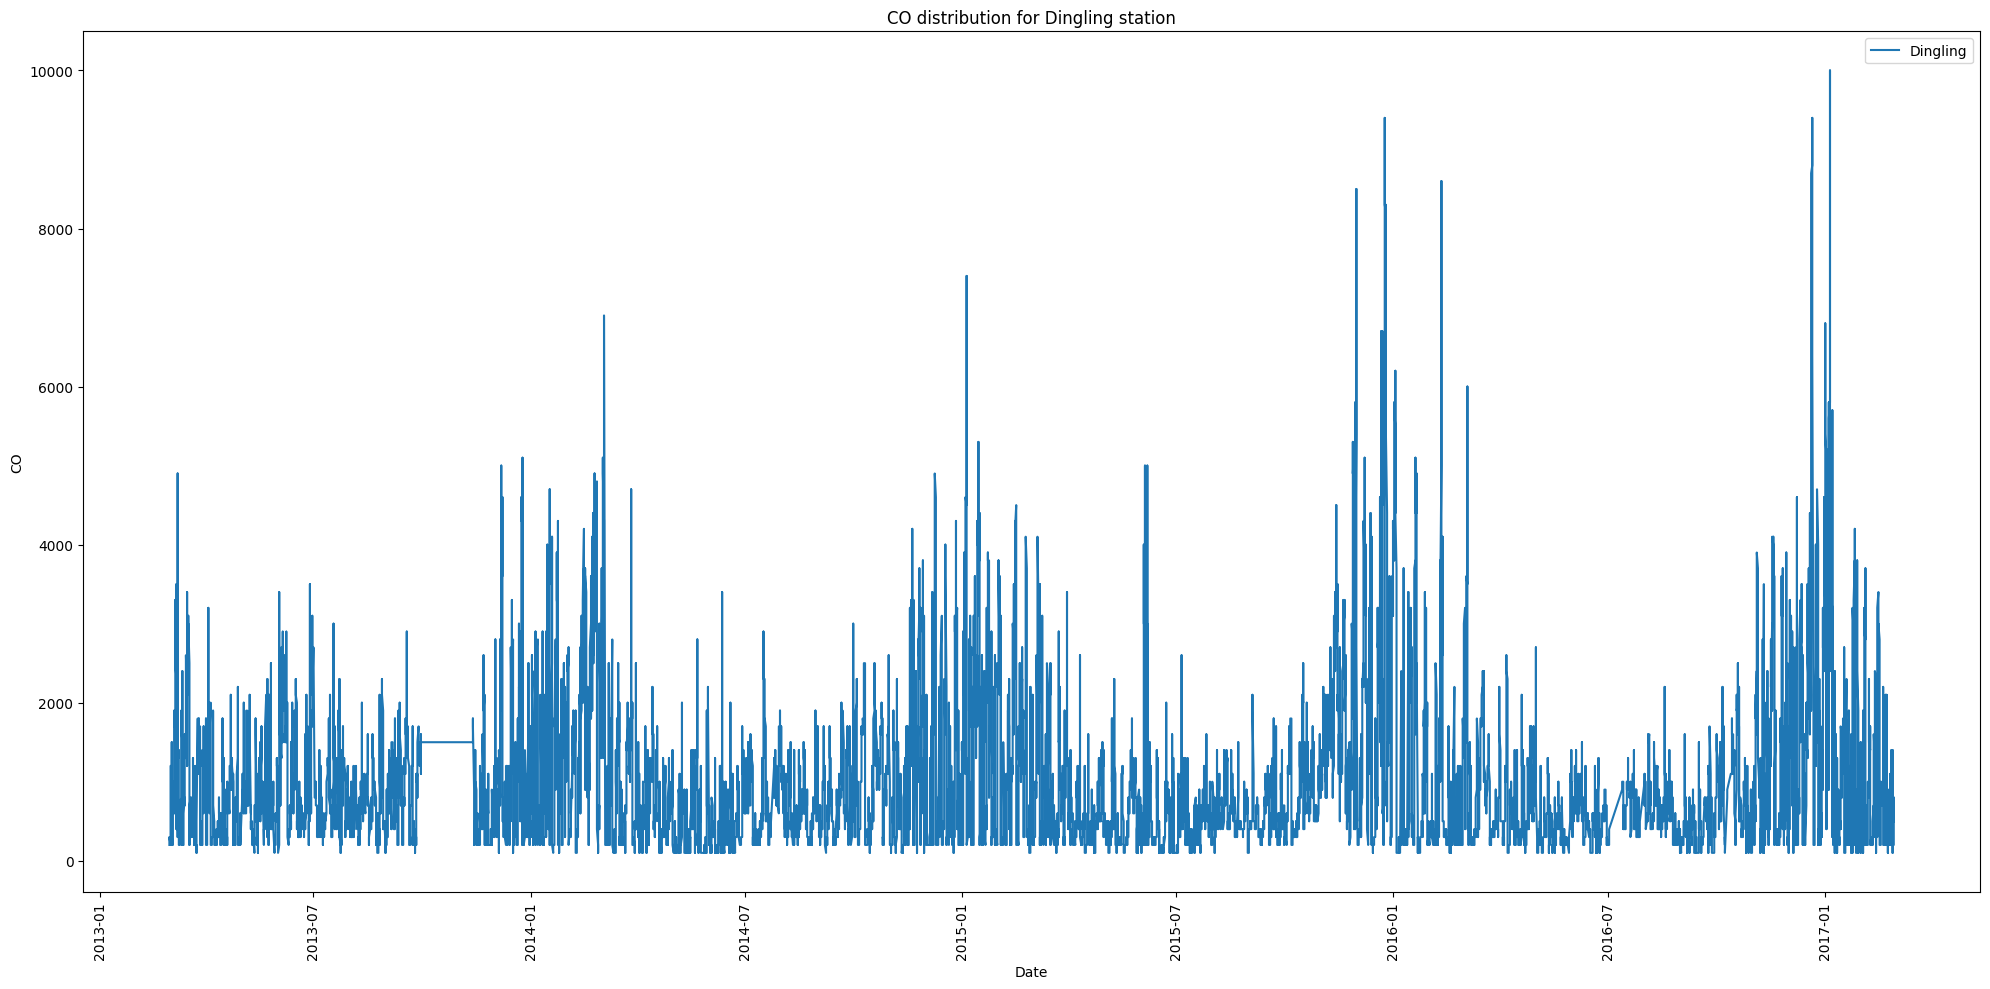

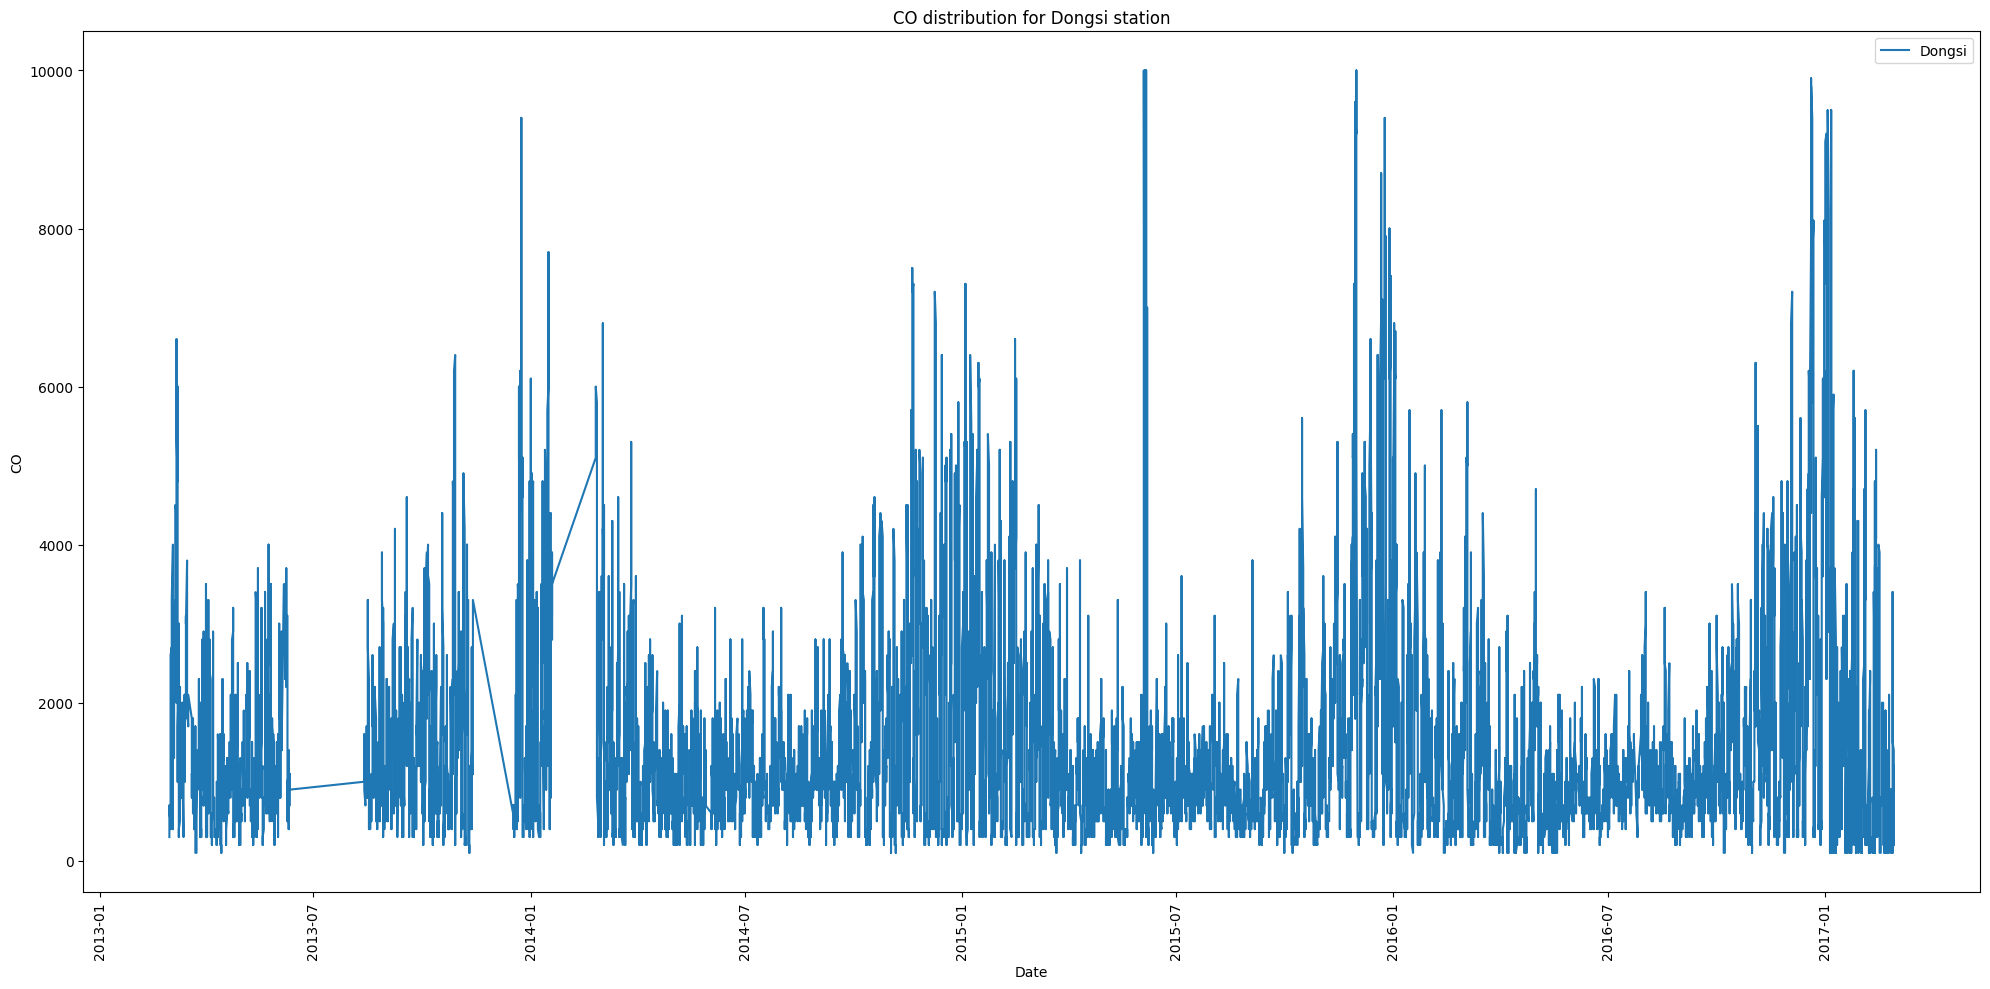

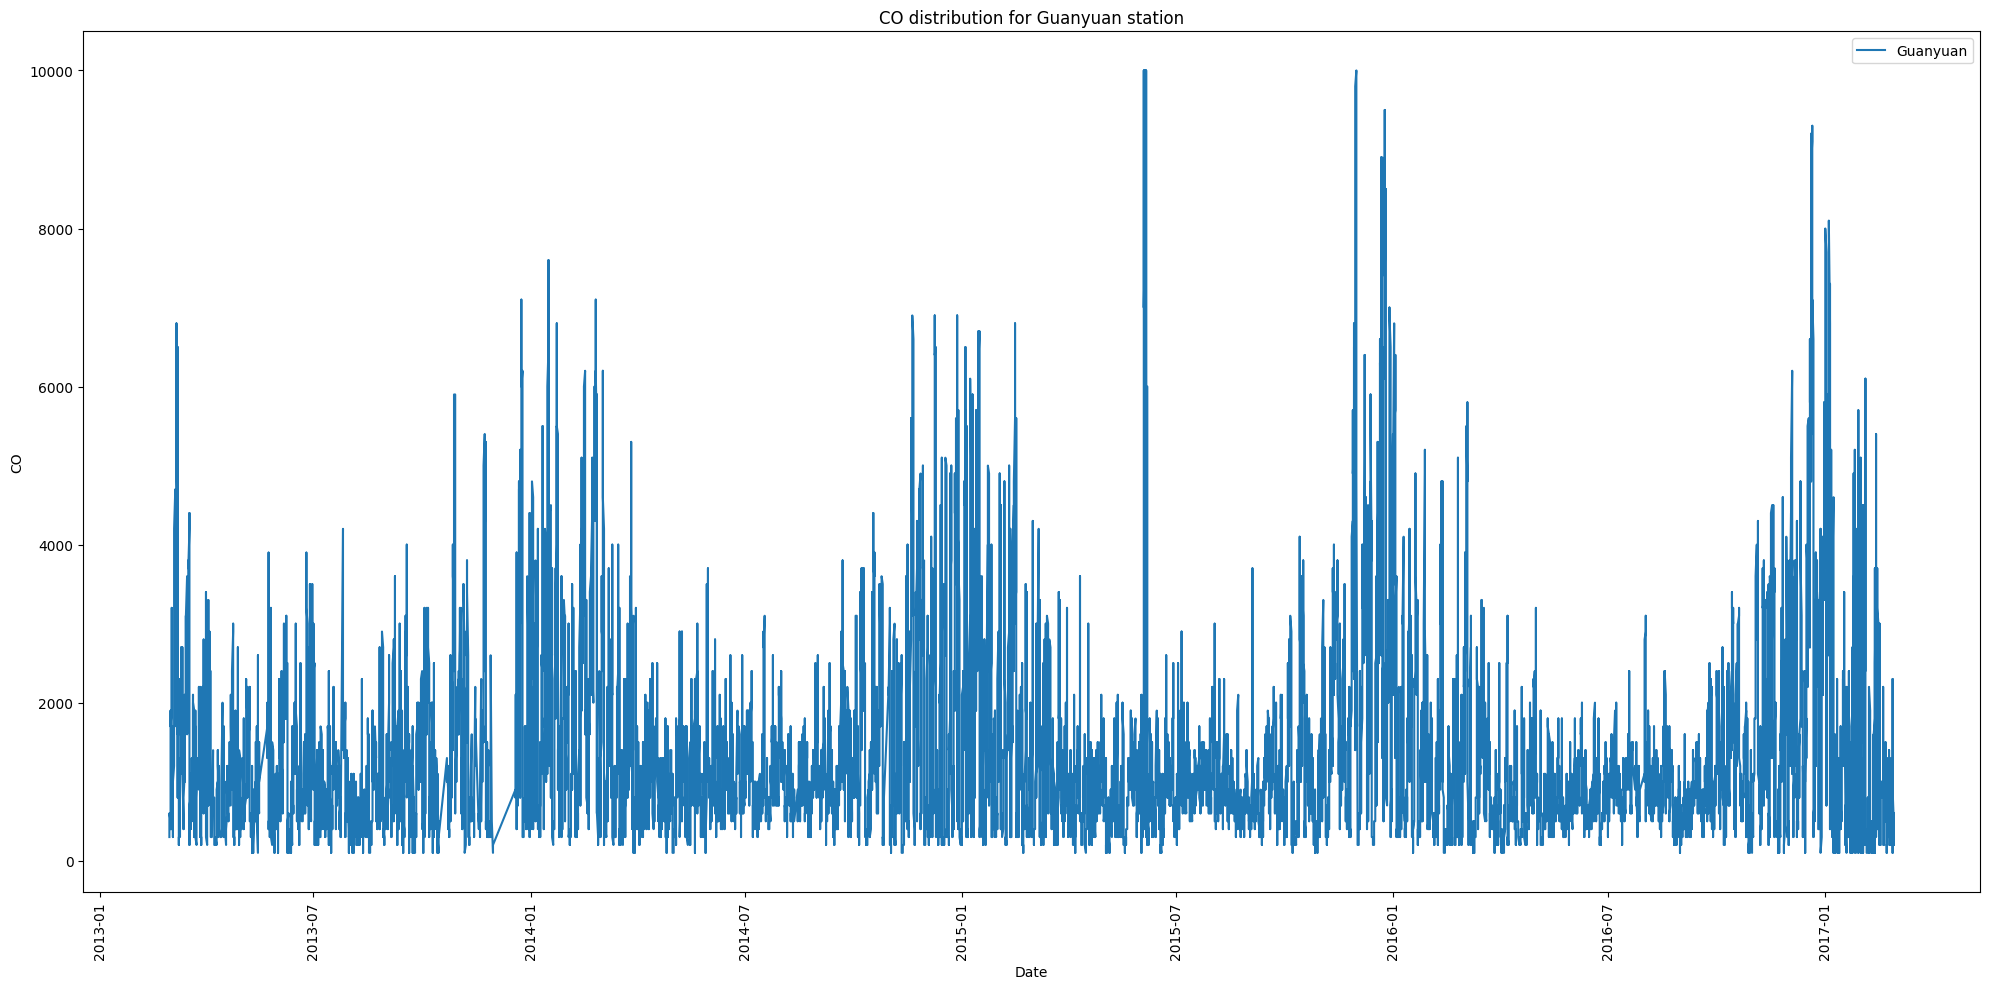

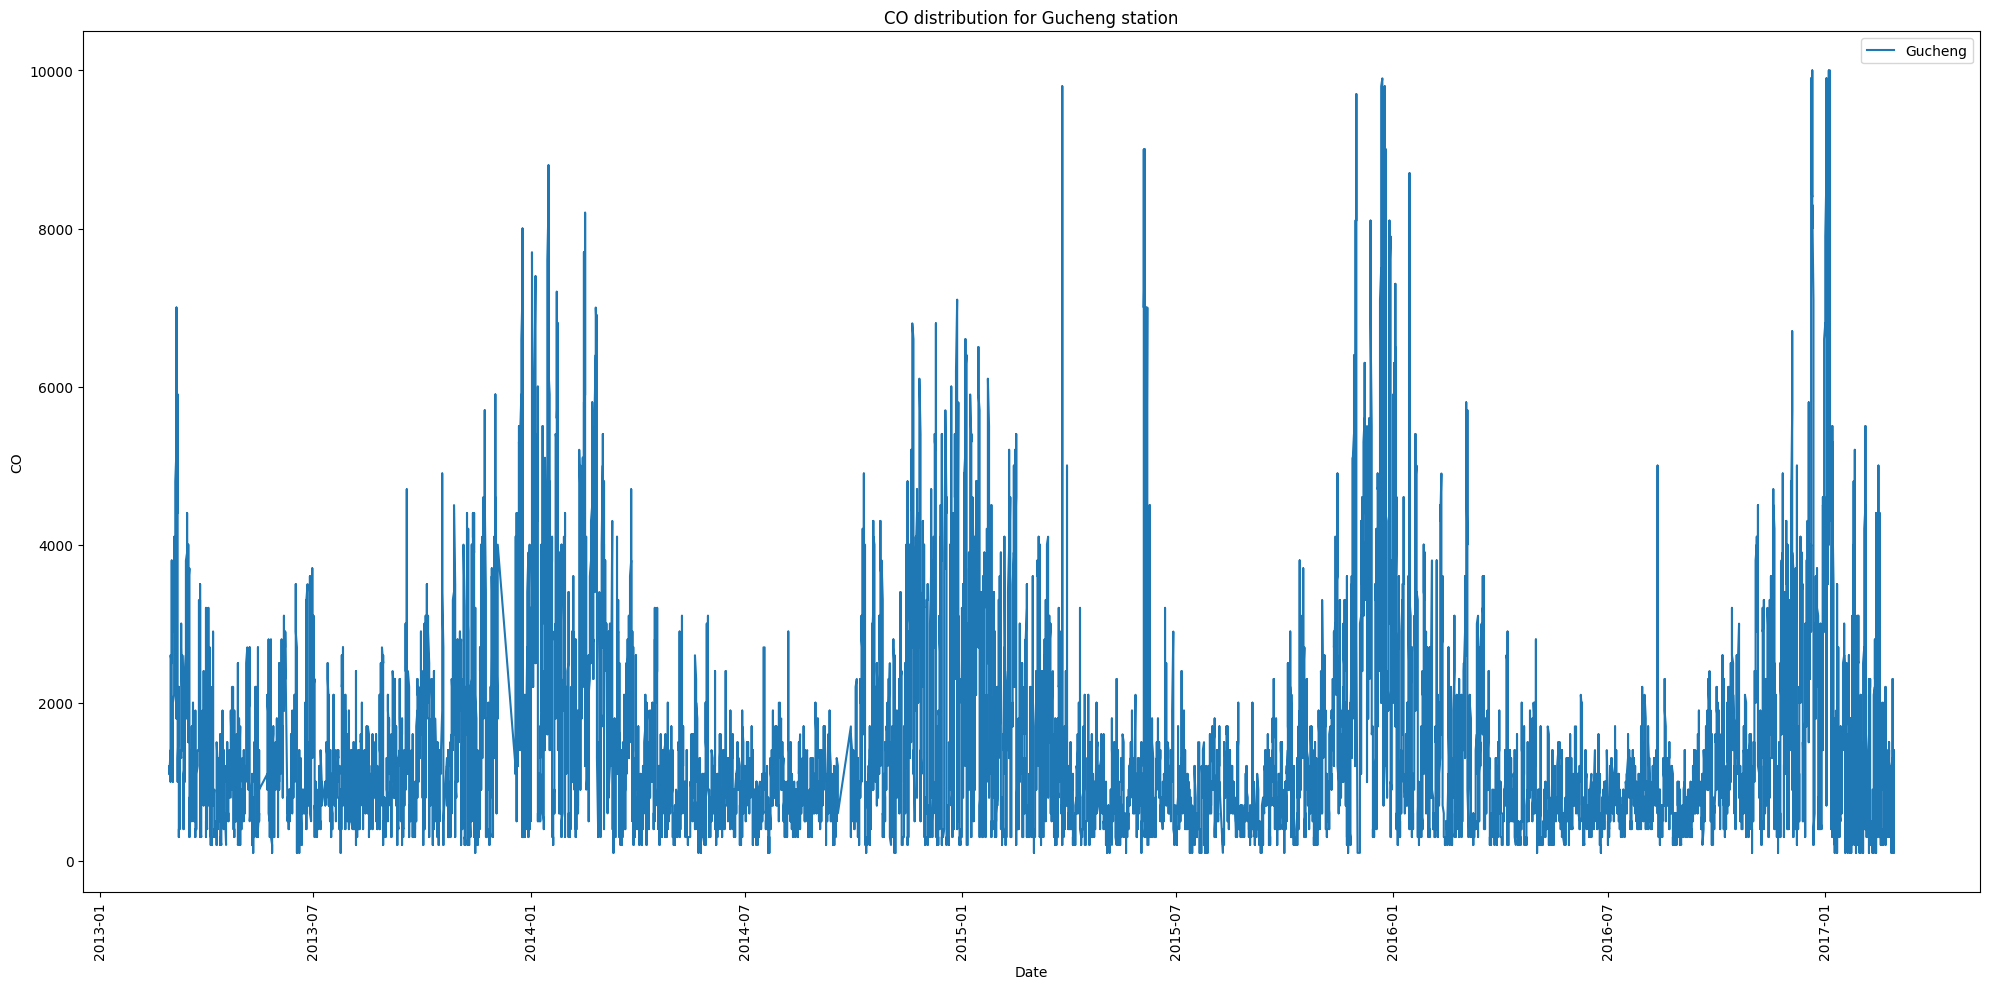

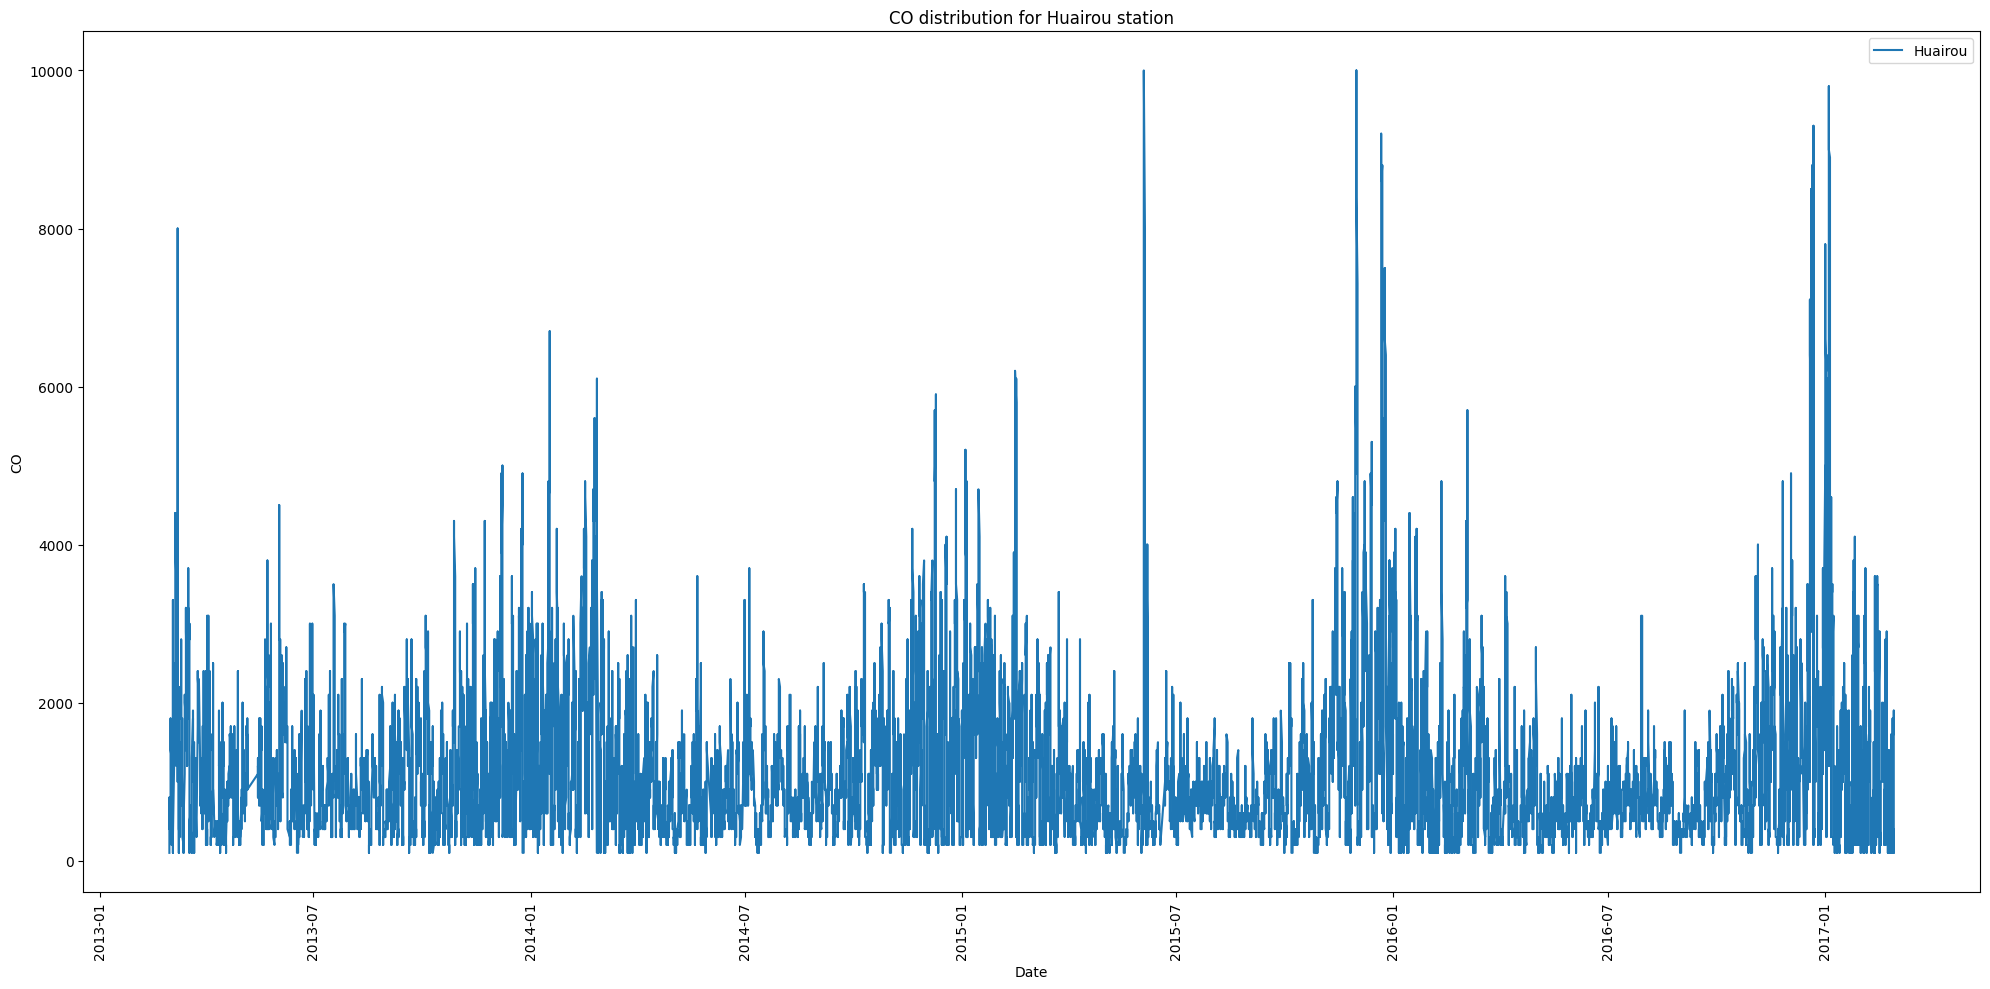

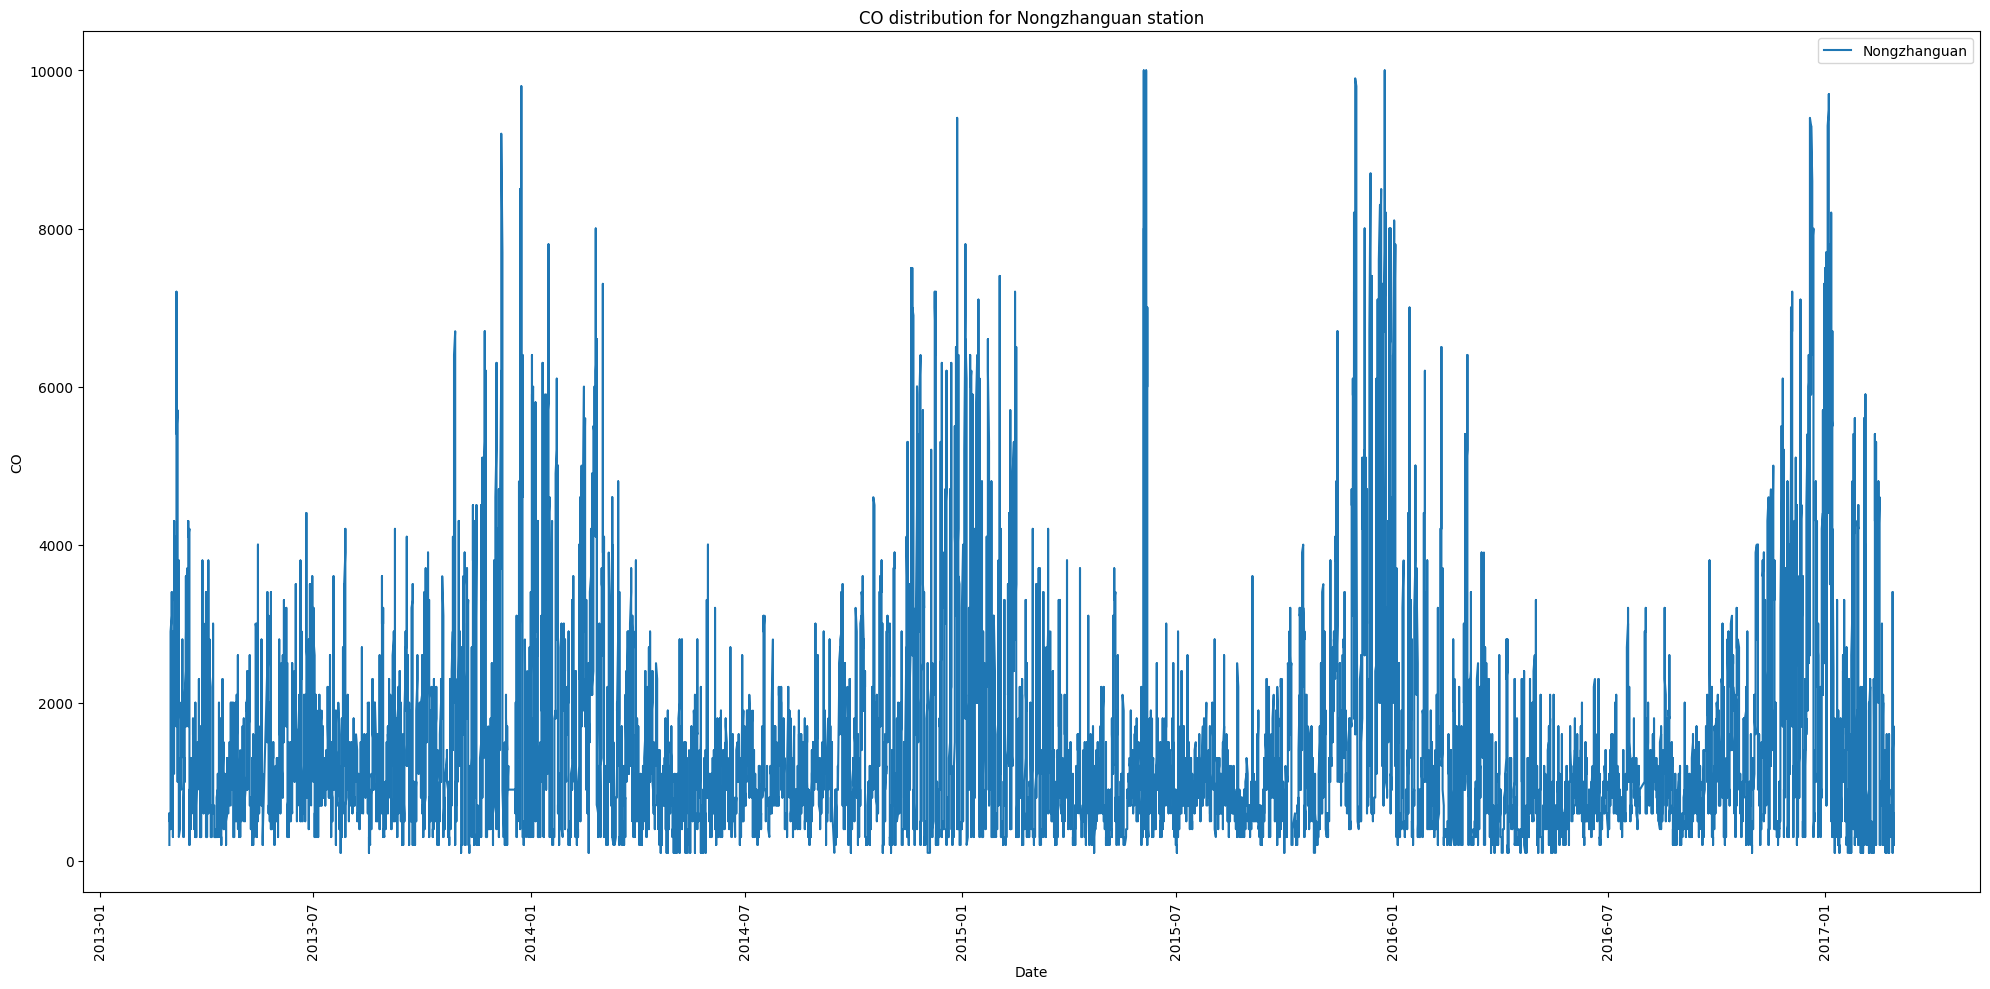

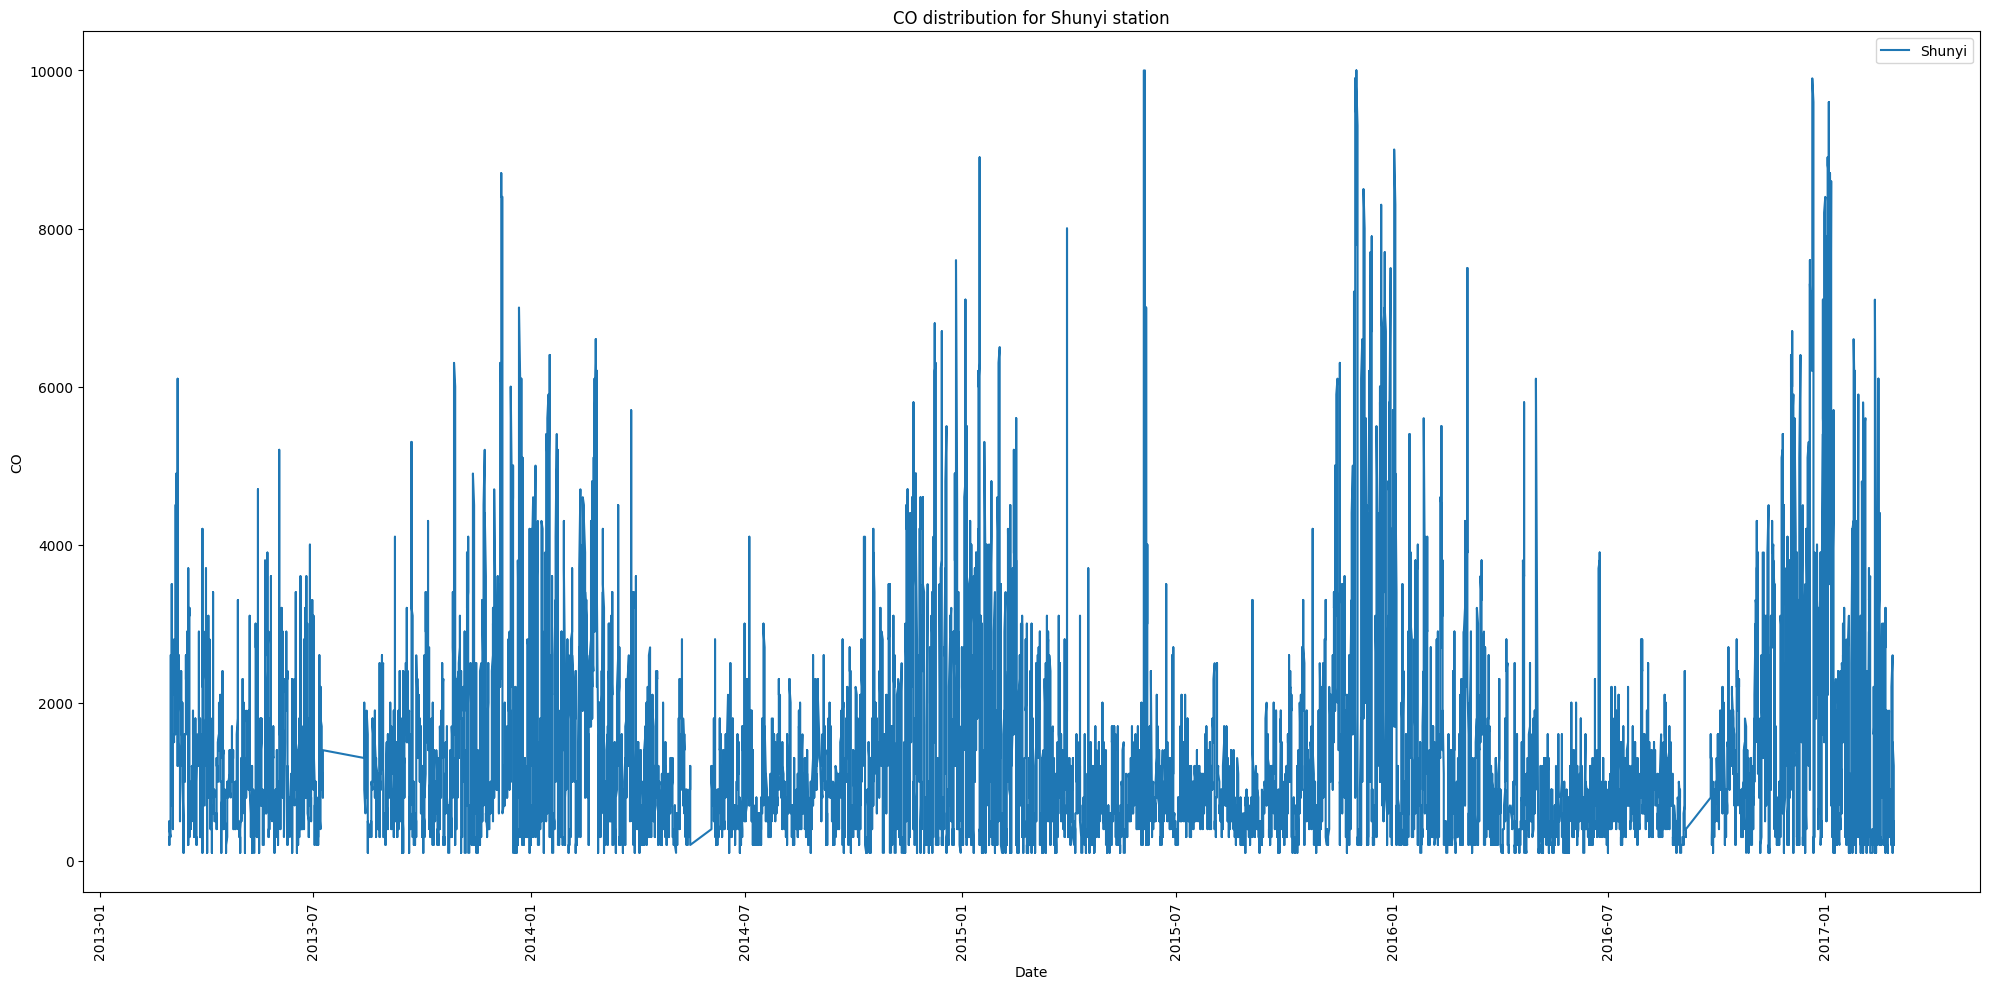

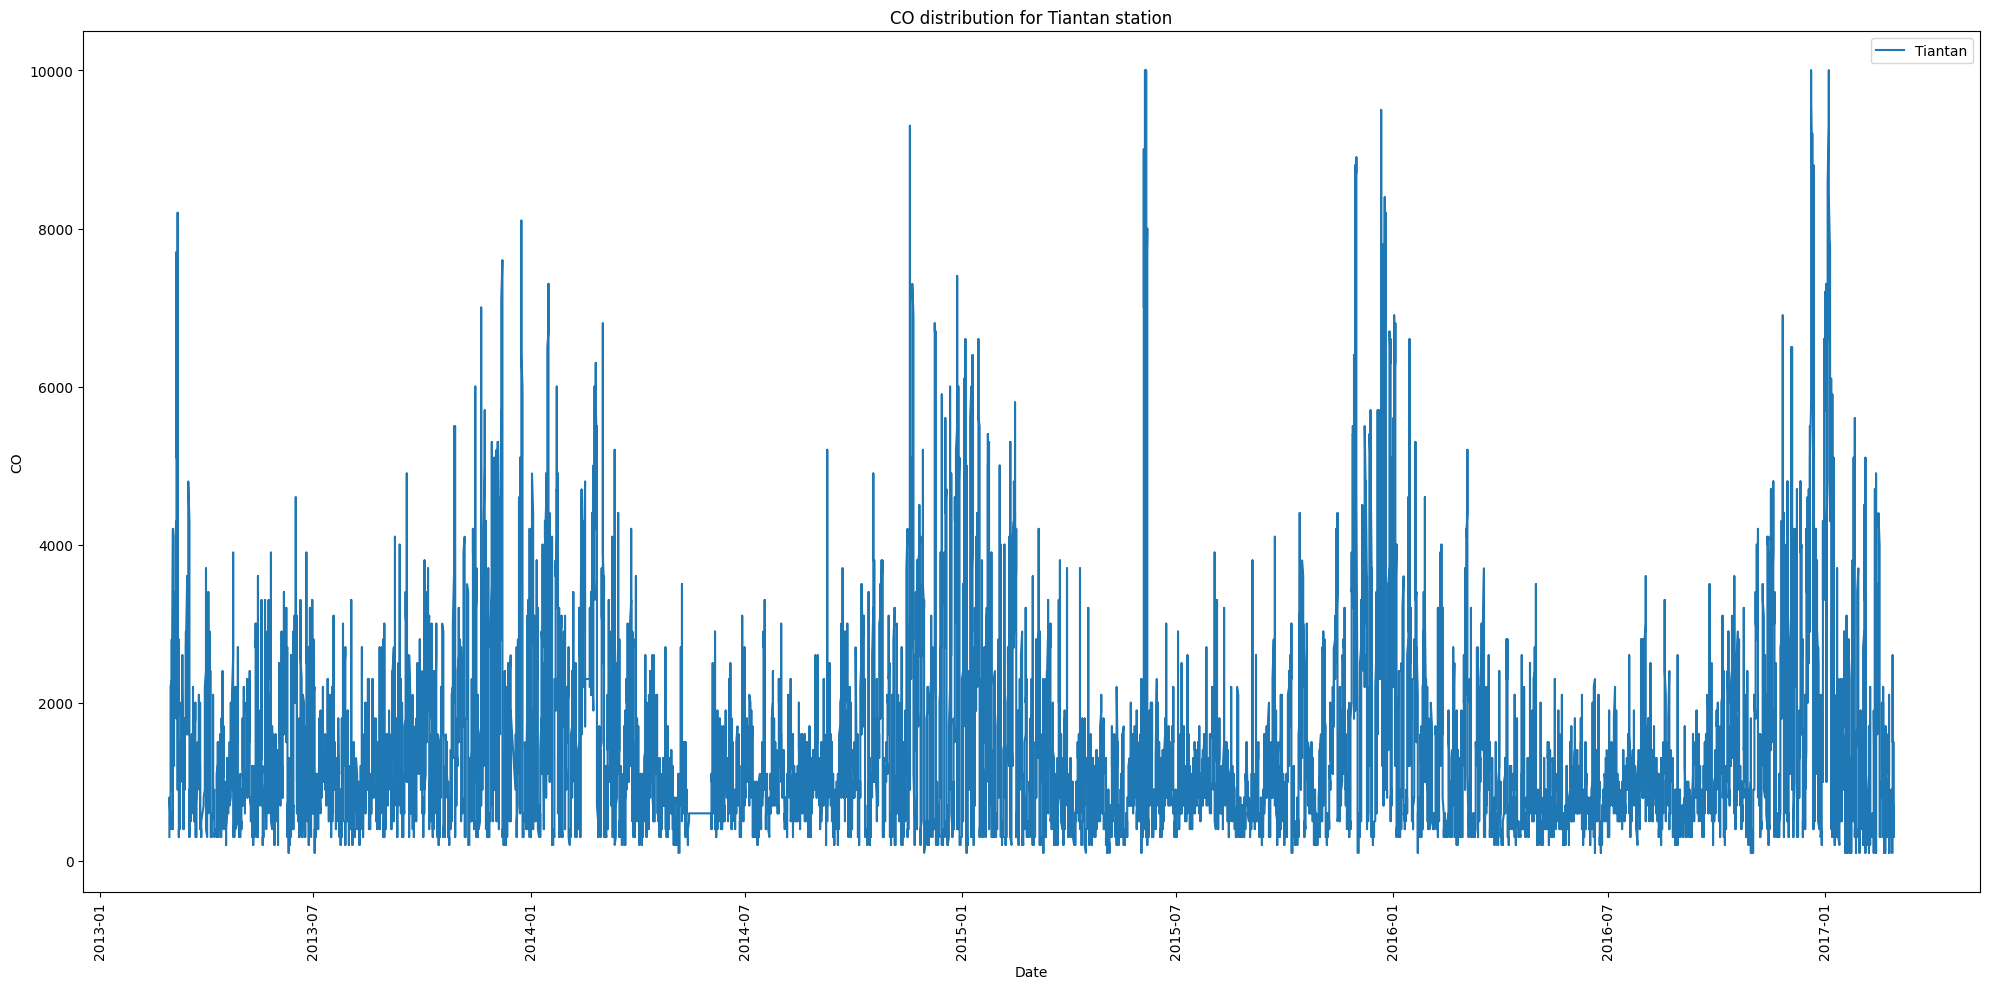

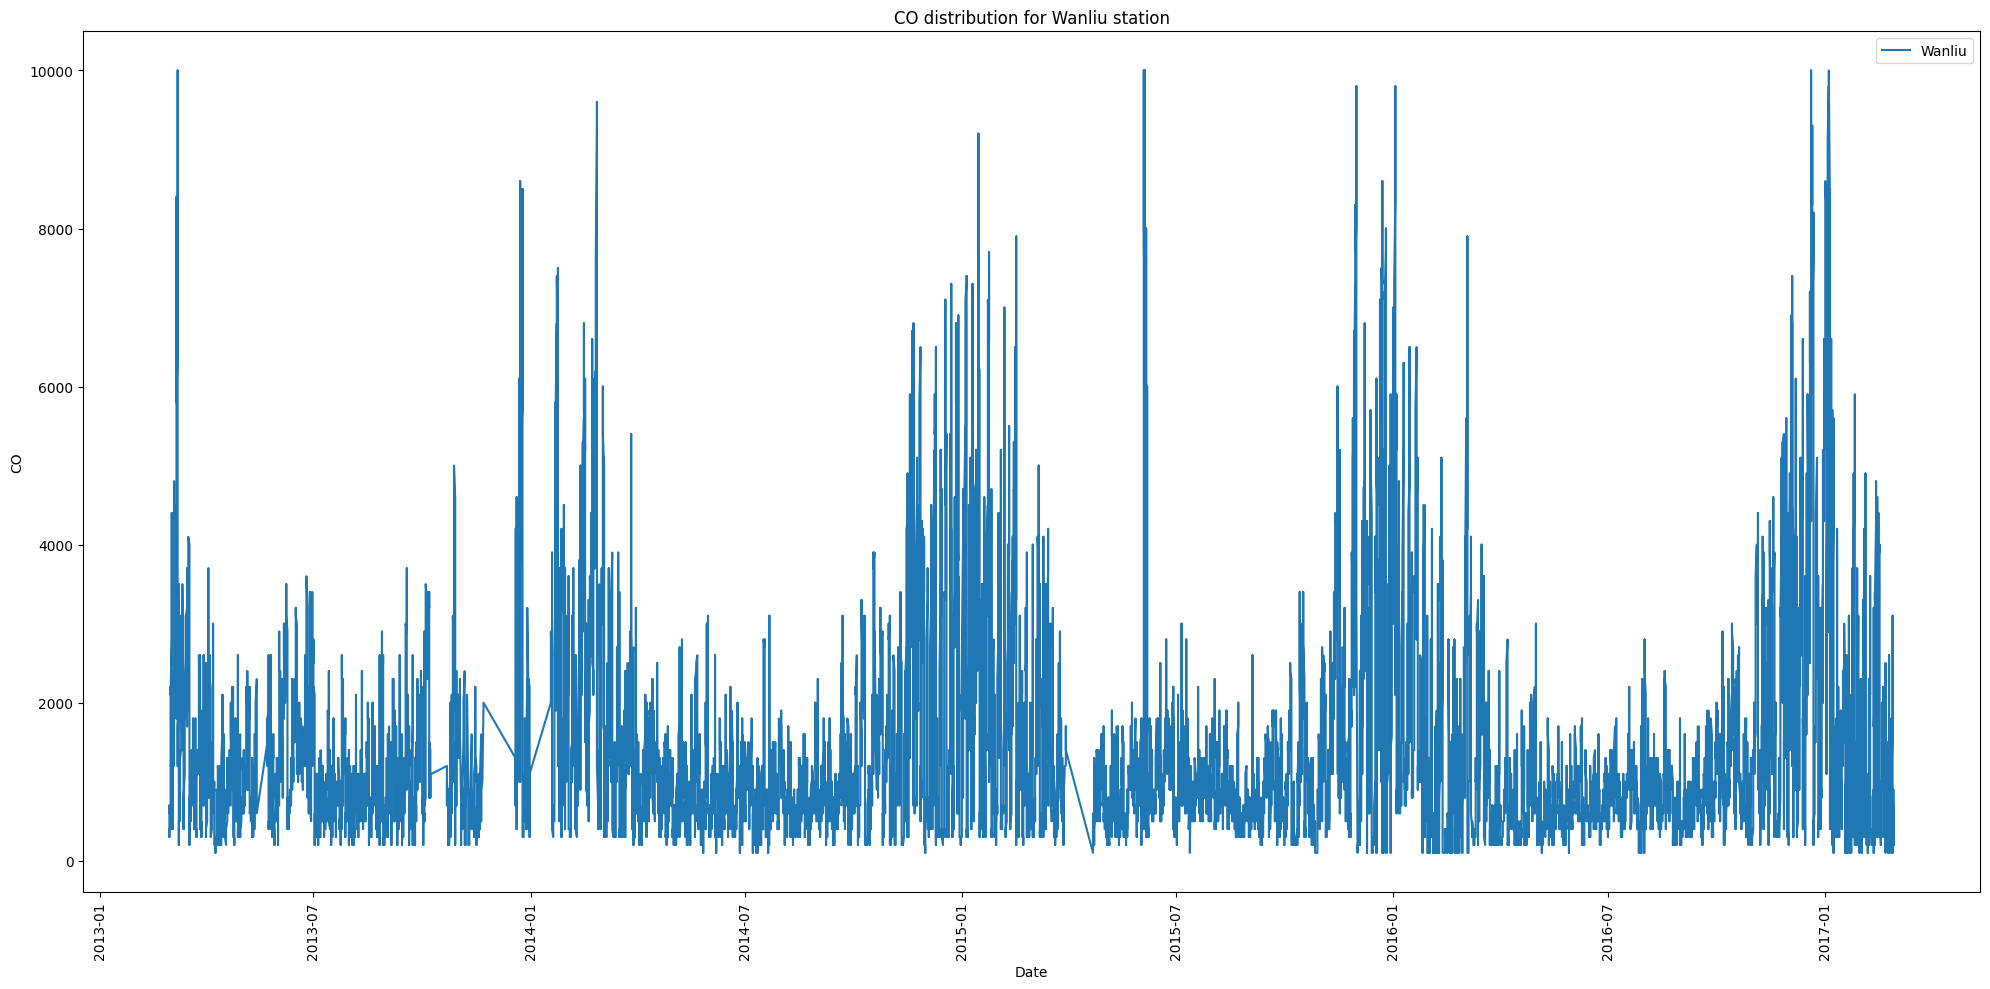

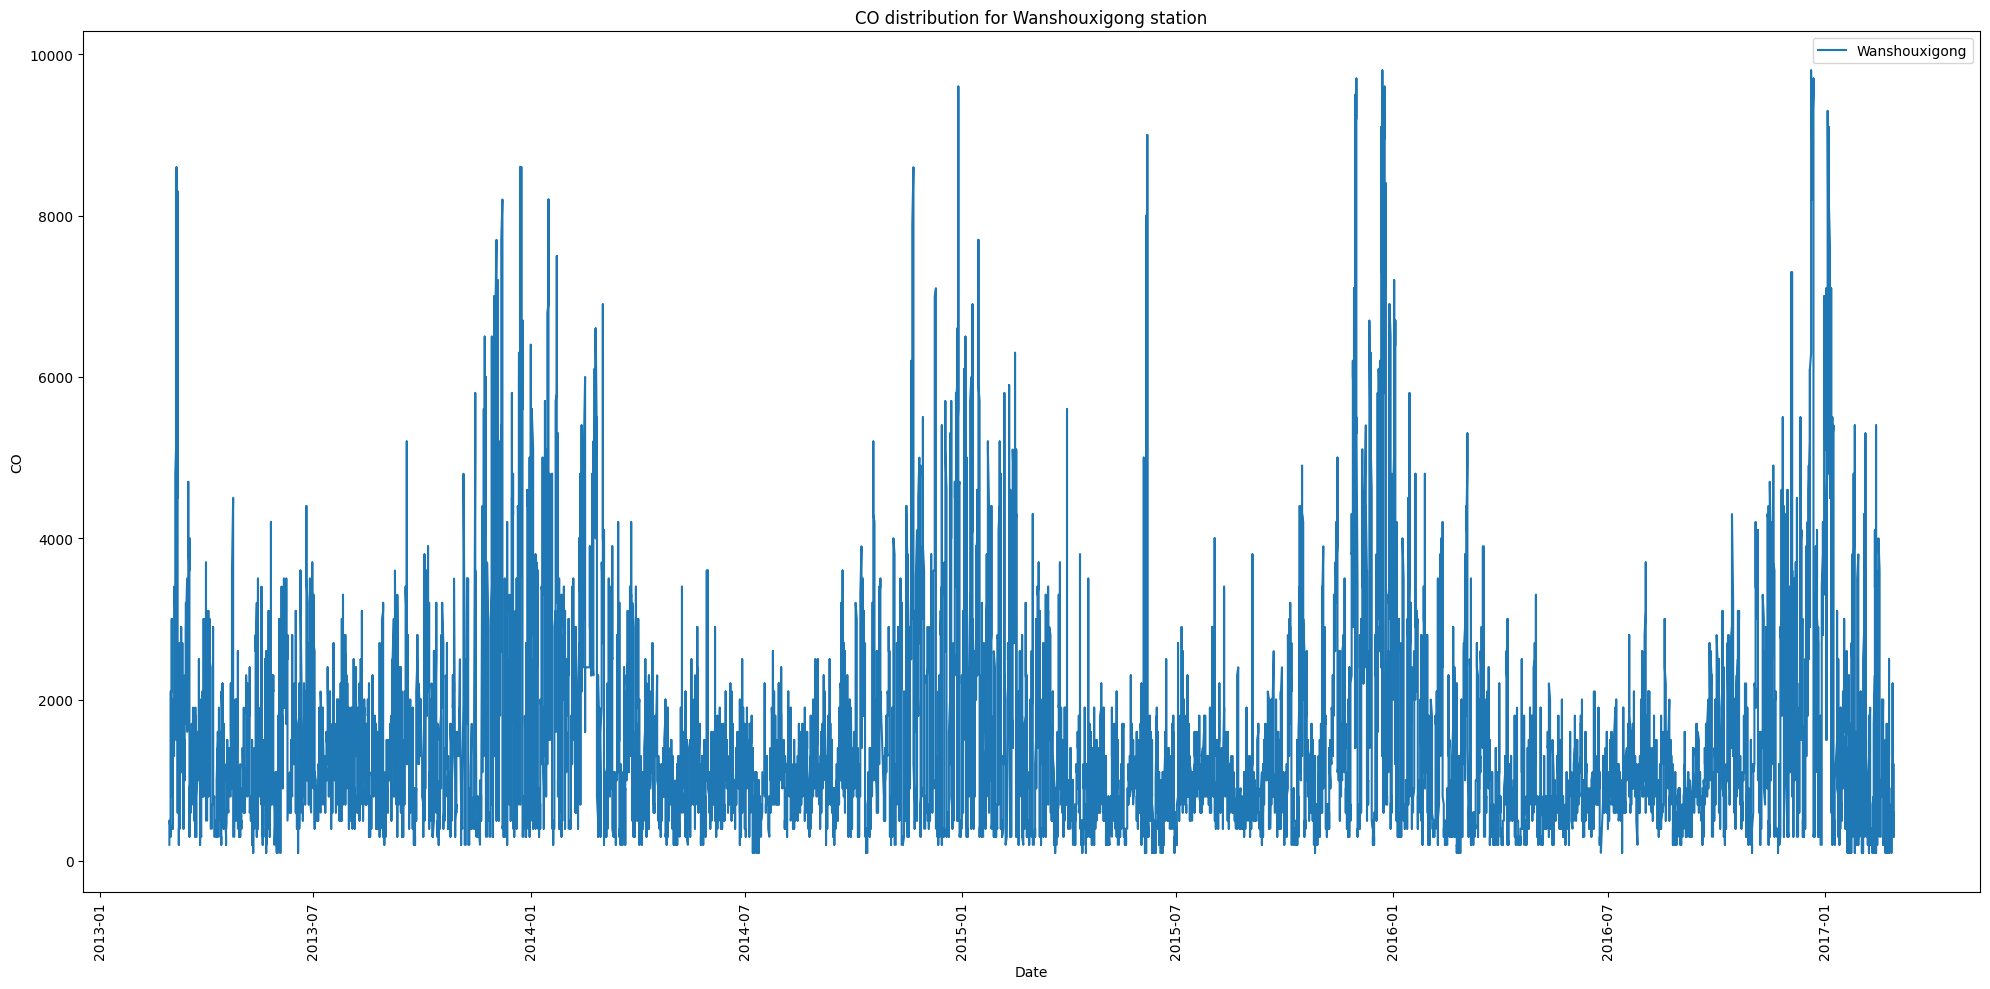

In [55]:
def plot_CO(station_select):
    df_selected = df[df['station'] == station_select]
    plt.figure(figsize=(20, 10))  # create a new figure for each station
    plt.plot(df_selected['date'], df_selected['CO'], label=station_select)
    plt.xlabel('Date')
    plt.ylabel('CO')
    plt.title(f'CO distribution for {station_select} station')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

stations = df['station'].unique()

for station in stations:
    plot_CO(station)


### Pertanyaan 2:

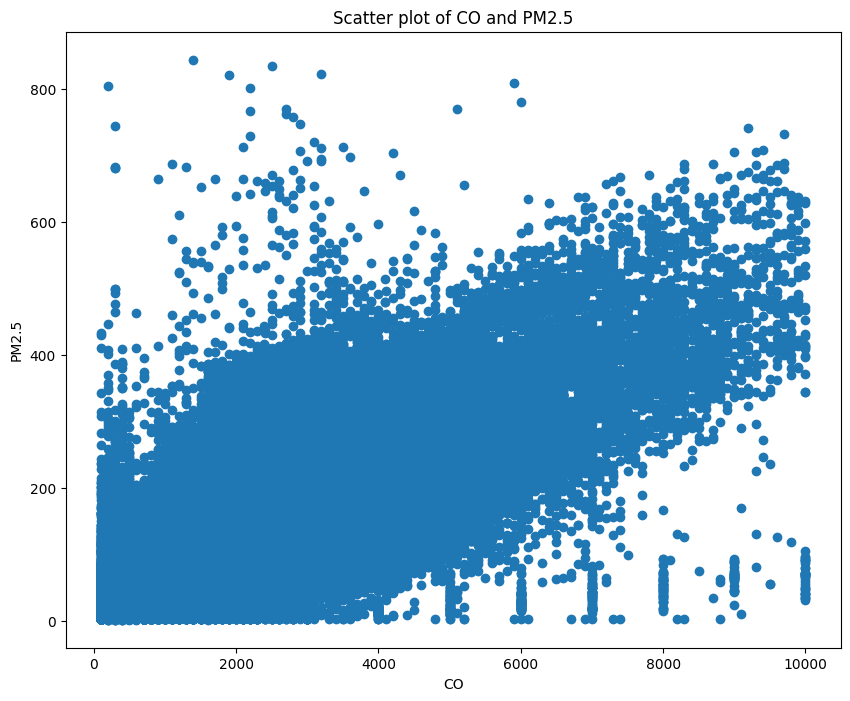

In [56]:
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.scatter(df['CO'], df['PM2.5'])
plt.xlabel('CO')
plt.ylabel('PM2.5')
plt.title('Scatter plot of CO and PM2.5')
plt.show()

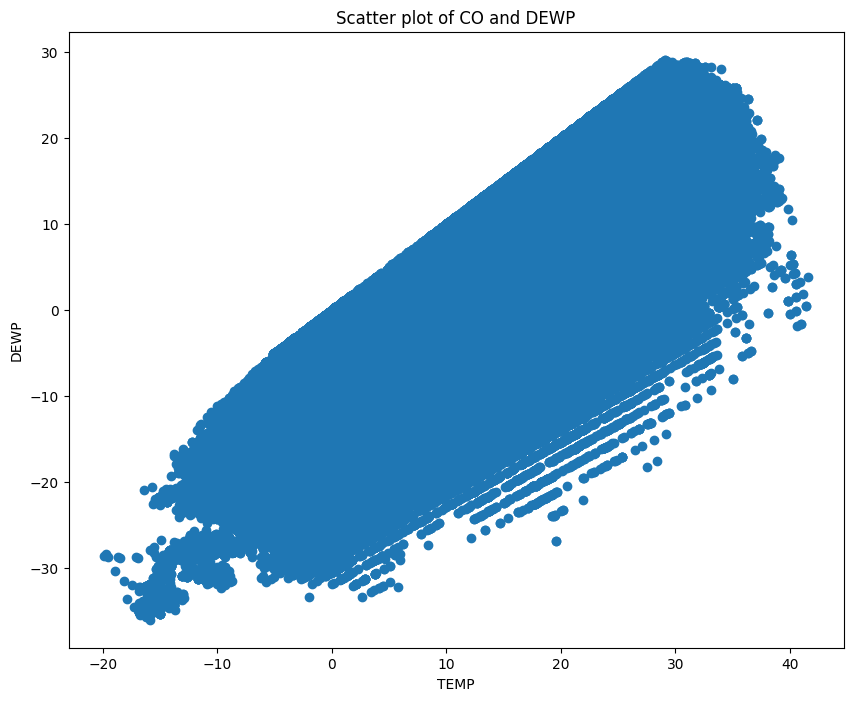

In [57]:
plt.figure(figsize=(10, 8))  # Increase the figure size
plt.scatter(df['TEMP'], df['DEWP'])
plt.xlabel('TEMP')
plt.ylabel('DEWP')
plt.title('Scatter plot of CO and DEWP')
plt.show()

## Conclusion

- Conclution pertanyaan 1:
    Peningkatan kadar CO di semua stasiun selalu mengalami kenaikan pada akhir hingga awal tahun. Hal ini disebabkan oleh adanya masa liburan sekolah yang ada didaerah data tersebut diambil yaitu China
- Conclution pertanyaan 2: 
    Plot persebaran yang telah dibuat menunjukkan korelasi positif yang kuat namun tidak linear antara CO dan PM2.5.
- Conclution pertanyaan 3: 
    Plot persebaran antara Temperature dan Dew Point menunjukkan hubungan yang erat antara peningkatan, meskipun terdapat variabilitas yang lebih tinggi pada level temperature yang lebih rendah.